# CLASSIFICATION OF ECG Signal USING ELM

In [1]:
#ELM basic implementation
import elm
#ELM Standard Library
#dependencies
import numpy as np
import numpy.matlib as npm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
# from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt
import os
import csv
import math
import random

In [2]:
# matplotlib settings
plt.rcParams["figure.figsize"] = (30,6)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'b'
plt.rcParams['axes.grid'] = True 

In [3]:
#variables
path = '\\database\\'
window_size = 160
maximum_counting = 10000

classes = ['N', 'L', 'R', 'A', 'V', '/']
classes_len = len(classes)
count_classes = [0] * classes_len

X = list()
Y = list()

## Necessary Functions

In [4]:
def get_elm_fitness(weightBais):
    tempWeightBais = weightBais.reshape(numberOfHiddenNuerons,numberOfInputNuerons+1, order="F")
    inputWeight = tempWeightBais[:,:numberOfInputNuerons]                 
    baisOfHiddenNuerons = tempWeightBais[:,numberOfInputNuerons]
    
    #--- Create Instance of ELM Model ---+
    model = elm.ELM(
        X_train.shape[1],
        numberOfHiddenNuerons,
        classes_len,
        activation = "sigmoid",
        w_init=np.transpose(inputWeight),
        bias_init=baisOfHiddenNuerons
    )

    #--- Train ---+
    model.fit(X_train, Y_train)
    #--- Predict and Evaluate ---+
    _, _, fitness = model.evaluate(X_train, Y_train)  #fitness is basically rmse score
    beta, _, _ = model.get_weights()
    return fitness, beta

In [5]:
def confusion_matrix(Y_pred, Y_test):
    T = Y_pred
    Y = Y_test
    N = T.shape[0]
    batch = 1000
    C = 6
    nb = int(np.ceil(float(N) / batch))
    conf = np.zeros((C, C))
    for b in range(nb):
        start = b*batch
        stop = min((b+1)*batch, N)
        Tb = np.array(T[start:stop]) > 0.5
        Yb = np.array(Y[start:stop]) > 0.5
        for c1 in range(C):
            for c1h in range(C):
                conf[c1, c1h] += np.sum(Tb[:, c1] * Yb[:, c1h])
    return conf   

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix'):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure()
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        #cm[i, j] = 0 if np.isnan(cm[i, j]) else cm[i, j]
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [7]:
def ensure_bounds(vec):
    # bounds here [-1, 1]
    new_vec = []
    for i in range(len(vec)):
        if vec[i] > 1:
            new_vec.append(1)
        elif vec[i] < -1:
            new_vec.append(-1)
        else:
            new_vec.append(vec[i])

    return np.array(new_vec)

## Loading Dataset

In [8]:
# Read file names
filenames = os.walk(os.getcwd()+path).__next__()[2]

records = list()
annotations = list()

filenames.sort()

In [9]:
#segregate records and annotations from filenames
for f in filenames:
    filename, file_ext = os.path.splitext(f)
    if(file_ext == '.csv'):
        records.append(f)
    else:
        annotations.append(f)

In [10]:
#read from CSV files
for i in range(0, len(records)):
    signals = []
    with open(os.getcwd()+path+"\\"+records[i], 'rt') as csvfile:
        reader = csv.reader(csvfile, delimiter = ',', quotechar='|')
        row_index = -1
        for row in reader:
            if(row_index >= 0):
                signals.insert(row_index, int(row[1]))
            row_index += 1

    with open(os.getcwd()+path+"//"+annotations[i], 'r') as fileID:
        data = fileID.readlines()
        beat = []
        for d in range(1, len(data)):
            splitted = data[d].split(' ')
            splitted = filter(None, splitted)
            next(splitted) #skipping time col
            pos = int(next(splitted)) # Sample ID
            arrhythmia_type = next(splitted) # Type
            if arrhythmia_type in classes:
                arrhythmia_index = classes.index(arrhythmia_type)
                if count_classes[arrhythmia_index] > maximum_counting:
                    pass # to avoid overfitting
                else:
                    count_classes[arrhythmia_index] += 1
                    if(window_size < pos and pos < (len(signals) - window_size)):
                        beat = signals[pos-window_size+1:pos+window_size]
                        X.append(beat)
                        Y.append(arrhythmia_index)

N


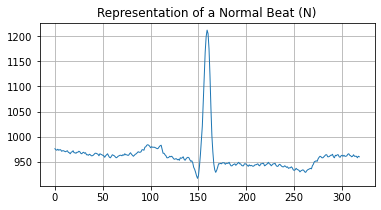

In [11]:
plt.figure(figsize=(6,3))
plt.title("Representation of a Normal Beat (N)")
plt.plot(X[0])
print(classes[Y[0]])

A


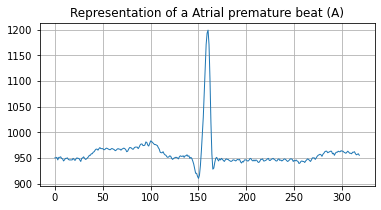

In [12]:
plt.figure(figsize=(6,3))
plt.title("Representation of a Atrial premature beat (A)")
plt.plot(X[6])
print(classes[Y[6]])

L


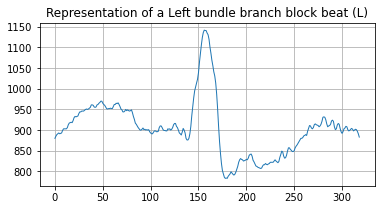

In [13]:
plt.figure(figsize=(6,3))
plt.title("Representation of a Left bundle branch block beat (L)")
plt.plot(X[16165])
print(classes[Y[16165]])

V


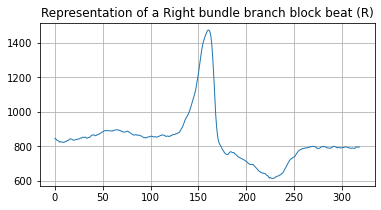

In [14]:
plt.figure(figsize=(6,3))
plt.title("Representation of a Right bundle branch block beat (R)")
plt.plot(X[20980])
print(classes[Y[20980]])

V


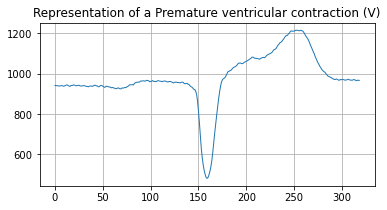

In [15]:
plt.figure(figsize=(6,3))
plt.title("Representation of a Premature ventricular contraction (V)")
plt.plot(X[1905])
print(classes[Y[1905]])

/


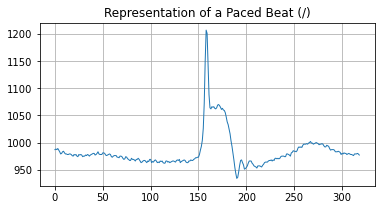

In [16]:
plt.figure(figsize=(6,3))
plt.title("Representation of a Paced Beat (/)")
plt.plot(X[4133])
print(classes[Y[4133]])

## Viewing the data

In [17]:
for i in range(0, len(X)):
    X[i].append(Y[i])

print(np.shape(X))


(42021, 320)


0    9997
1    8071
2    7255
4    7129
5    7023
3    2546
Name: 319, dtype: int64


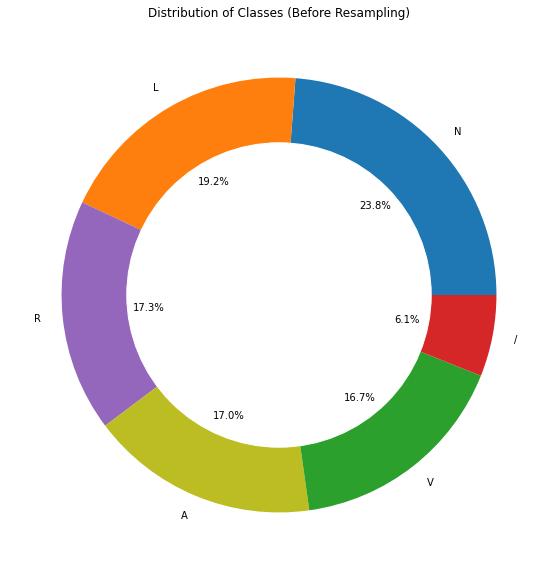

In [18]:
# representation of classes % wise
X_train_df = pd.DataFrame(X)
per_class = X_train_df[X_train_df.shape[1]-1].value_counts()
print(per_class)
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['N', 'L', 'R', 'A', 'V', '/'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green','tab:red'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Distribution of Classes (Before Resampling)")
plt.show()

## Resampling the Data

In [19]:
from sklearn.utils import resample

df_1=(X_train_df[X_train_df[319]==1]).sample(n=1000,random_state=47)
df_2=(X_train_df[X_train_df[319]==2]).sample(n=1000,random_state=46)
df_3=(X_train_df[X_train_df[319]==3]).sample(n=1000,random_state=45)
df_4=(X_train_df[X_train_df[319]==4]).sample(n=1000,random_state=44)
df_5=(X_train_df[X_train_df[319]==5]).sample(n=1000,random_state=43)
df_0=(X_train_df[X_train_df[319]==0]).sample(n=1000,random_state=42)
X_train_df=pd.concat([df_0,df_1,df_2,df_3,df_4,df_5])

0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
Name: 319, dtype: int64


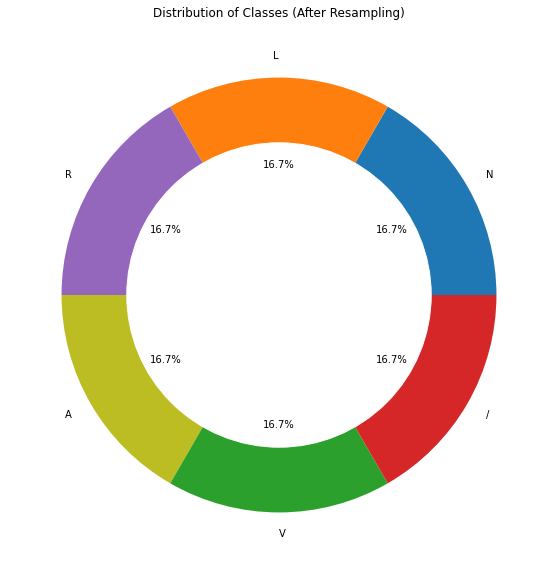

In [20]:
per_class = X_train_df[319].value_counts()
print(per_class)
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['N', 'L', 'R', 'A', 'V', '/'], colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green','tab:red'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Distribution of Classes (After Resampling)")
plt.show()

## Train Test Split

In [21]:
# Train Test Split
train, test = train_test_split(X_train_df, test_size=0.2)
print("X_train : ", len(train))
print("X_test  : ", len(test))

X_train :  4800
X_test  :  1200


In [22]:
X_train = train.iloc[:,:train.shape[1]-1].values
X_test = test.iloc[:,:test.shape[1]-1].values
print(np.shape(X_train), np.shape(X_test))

(4800, 319) (1200, 319)


In [23]:
enc = OneHotEncoder()
Y_train = enc.fit_transform(train[[319]]).toarray()
Y_test = enc.fit_transform(test[[319]]).toarray()
print(np.shape(Y_train), np.shape(Y_test))

(4800, 6) (1200, 6)


## ELM Implementation (From elm.py)

In [24]:
#ELM Variables
input_length = X_train.shape[-1]
num_classes = 6
num_hidden_layers = 1200

In [25]:
# Creating Instance of ELM Model
model = elm.ELM(
    input_length,
    num_hidden_layers,
    num_classes,
    activation = "sigmoid"
)

In [26]:
# Train
model.fit(X_train, Y_train, display_time=True)
train_loss, train_acc, rmse = model.evaluate(X_train, Y_train)
print('RMSE: %f' % rmse)
print('train loss: %f' % train_loss)
print('train acc: %f' % train_acc)

C:\Users\Arijit Jana\Desktop\Project\elm.py:14: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-x))


Train time: 2.4665117263793945
RMSE: 0.000104
train loss: 0.185502
train acc: 0.925833


In [27]:
# Validation
val_loss, val_acc, rmse = model.evaluate(X_test, Y_test)
print('RMSE: %f' % rmse)
print('val loss: %f' % val_loss)
print('val acc: %f' % (val_acc*100))

RMSE: 0.000000
val loss: 686324095.710144
val acc: 88.750000


In [28]:
beta, w, bais = model.get_weights()

In [29]:
# Visual Prediction
ttest = X_test[:5]
ttres = Y_test[:5]
predict = model(ttest)

Text(0.5, 1.0, 'Predicted Label: L | Actual Label: L')

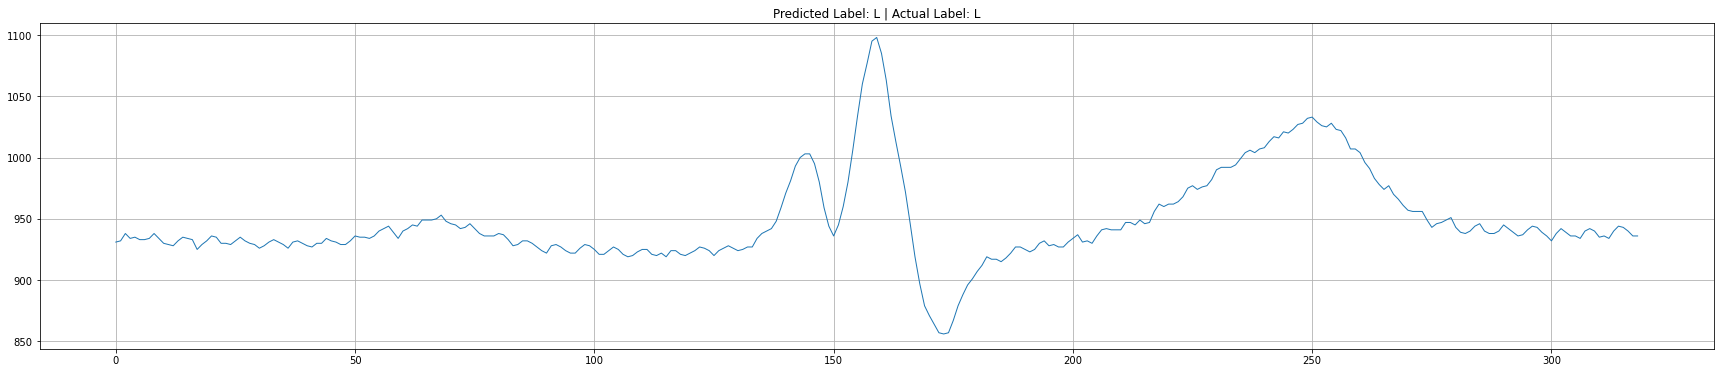

In [30]:
plt.plot(ttest[0])
plt.title("Predicted Label: {} | Actual Label: {}".format(classes[np.argmax(predict[0])],classes[np.argmax(ttres[0])]))

In [31]:
def final_elm_fitness(weightBais, bestWeight=0):
    tempWeightBais = weightBais.reshape(numberOfHiddenNuerons,numberOfInputNuerons+1, order="F")
    inputWeight = tempWeightBais[:,:numberOfInputNuerons]                 
    baisOfHiddenNuerons = tempWeightBais[:,numberOfInputNuerons]
    
    #--- Create Instance of ELM Model ---+
    model = elm.ELM(
        X_train.shape[1],
        numberOfHiddenNuerons,
        classes_len,
        activation = "sigmoid",
        w_init=np.transpose(inputWeight),
        bias_init=baisOfHiddenNuerons,
        # beta_init=bestWeight
    )

    #--- Train ---+
    model.fit(X_train, Y_train)
    #--- Predict and Evaluate ---+
    loss, acc, fitness = model.evaluate(X_test, Y_test)
    Y_pred = model(X_test)
    return loss, acc, fitness, Y_pred

In [35]:
weight = np.load('bestWeight-88.npy')
import itertools

192000
RMSE: 0.000000
train acc: 0.858333
Normalized confusion matrix


C:\Users\Arijit Jana\AppData\Local\Temp\ipykernel_12552\2519463306.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


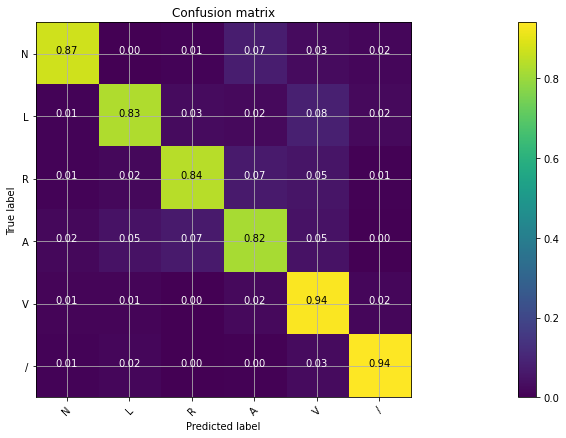

In [36]:
numberOfHiddenNuerons = 600
numberOfInputNuerons = X_train.shape[1]
XRmin = -1
XRmax = 1
NP = 50

D = numberOfHiddenNuerons * (numberOfInputNuerons+1)
print(D)
pop = np.zeros((NP,D))
XRRmin = npm.repmat(XRmin,NP,D)
XRRmax = npm.repmat(XRmax,NP,D)
pop = XRRmin+(XRRmax-XRRmin) * np.random.rand(NP,D)

loss, acc, fitness, Y_pred = final_elm_fitness(weight)
print('RMSE: %f' % fitness)
print('train acc: %f' % acc)
cm = confusion_matrix(Y_pred, Y_test)
plot_confusion_matrix(cm, classes, True)